In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.append('../'*3)
from pattern_mining_tools.modules.io.converter_writer import dat_to_binary
from global_param import data_dir_name

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc ('font', **font)

# Description

To get datadescription run ``scripts/dataset_characteristics''

## Data description

In [12]:
pd.read_csv('./results/data_description.csv', index_col=0) 

,name,|G|,|M|,density,#classes,#attributes,#levels,#concepts
0,adult,48842,95,0.15,2,14,12,359141.0
1,auto,205,129,0.19,6,8,8,57789.0
2,breast,699,14,0.64,2,10,6,361.0
3,car_evaluation,1728,21,0.29,4,6,6,8000.0
4,chess_kr_k,28056,40,0.15,18,6,6,84636.0
5,cylinder_bands,540,120,0.28,2,39,19,39829537.0
6,dermatology,366,43,0.28,6,33,9,14152.0
7,ecoli,327,24,0.29,5,8,6,425.0
8,glass,214,40,0.22,6,10,8,3246.0
9,heart-disease,303,45,0.29,5,0,9,25539.0


## Summary on GDPM-INT and GDPM-ENT

In [11]:
pd.read_csv('./results/ME_F.csv',index_col=0, sep = ';')

,|G|,|M|,#attributes,n_itemsets,ME time,F time,ME nodes,F nodes
name,,,,,,,,
adult,48842,95,14,359141,984,837,359141,338906
auto,205,129,8,57789,6,2,57390,48834
breast,699,14,10,361,0,0,361,354
car_evaluation,1728,21,6,8000,1,0,4875,6901
chess_kr_k,28056,40,6,84636,146,148,54761,68869
cylinder_bands,540,120,39,39829537,2404,4010,39829537,37007525
dermatology,366,43,33,14152,1,1,10506,12172
ecoli,327,24,8,425,0,0,425,373
glass,214,40,10,3246,0,0,2393,2757


# Detailed comparison of  of the GDPM-INT and GDPM-EXT

In [13]:
def reduce_labels(locs):
    def get_power(v):
        i = 0
        while v > 1:
            v /= 10
            i += 1
        return i - 1
    new_labels = []
    for v in locs:
        pw = get_power(v) 
        new_v = int(np.round(v / (10**pw), 0))
        new_labels.append(r'${0}e{1}$'.format(new_v, pw))
    return new_labels

## The execution time

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


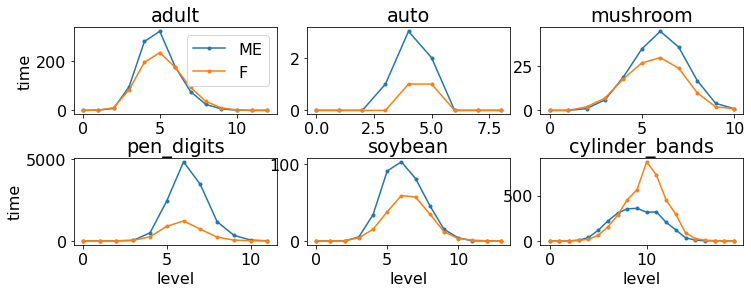

In [14]:
data_time_list = ['adult', 'auto',   'mushroom', 'pen_digits', 'soybean','cylinder_bands',] #'nursery'
n_rows = 2
n_columns = int((len(data_time_list) + 1)/n_rows)
fig, axs = plt.subplots(n_rows, n_columns, figsize=(12,4))
for i, data_name in enumerate(data_time_list):
    dir_name = data_dir_name  + data_name + '/transformed/closure_structure/dat/'
    df_ME = pd.read_csv(dir_name + 'summary_ME.csv', sep = ';', header = None, index_col = 0).T
    df_F = pd.read_csv(dir_name + 'summary_F.csv', sep = ';', header = None, index_col = 0).T
    axs[int(i/n_columns), i%n_columns].plot(df_ME.level, df_ME.time, label = 'ME', marker = '.')
    axs[int(i/n_columns), i%n_columns].plot(df_F.level, df_F.time, label = 'F', marker = '.')
    axs[int(i/n_columns), i%n_columns].set_title(data_name)
    axs[int(i/n_columns), i%n_columns].set_xlabel('level')
    

for i in range(n_rows):
    axs[i,0].set_ylabel('time')

for i in range(n_columns):
    axs[0,i].set_xlabel('')
    
axs[0,0].legend(loc = 0)

plt.subplots_adjust(wspace=0.15, hspace=0.5)
fig.savefig('./results/time_me_f.png', transparent = True, bbox_inches='tight',  pad_inches=0.1)

## Trie sizes in the number of nodes

<ipython-input-17-f8d4d4d77b0c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[int(i/n_columns), i%n_columns].set_yticklabels(['', '0'] + new_labels[2:])
<ipython-input-17-f8d4d4d77b0c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[int(i/n_columns), i%n_columns].set_yticklabels(['', '0'] + new_labels[2:])
<ipython-input-17-f8d4d4d77b0c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[int(i/n_columns), i%n_columns].set_yticklabels(['', '0'] + new_labels[2:])
<ipython-input-17-f8d4d4d77b0c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[int(i/n_columns), i%n_columns].set_yticklabels(['', '0'] + new_labels[2:])
<ipython-input-17-f8d4d4d77b0c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[int(i/n_columns), i%n_columns].set_yticklabels(['', '0'] + new_labels[2:])
<ipython-input-17-f8d4d4d77b0c>:16: User

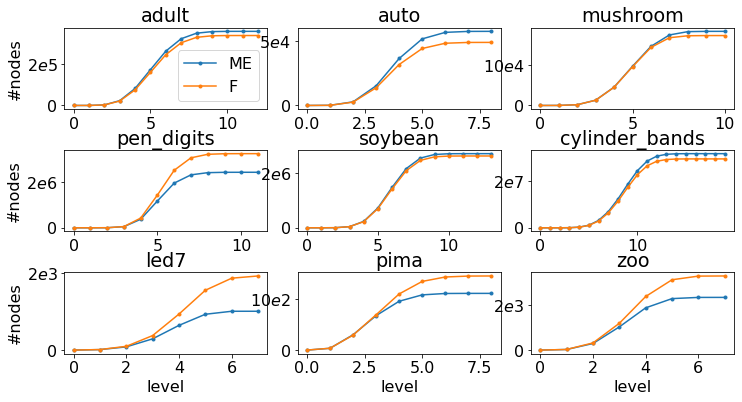

In [17]:
data_time_list = ['adult', 'auto',   'mushroom', 'pen_digits', 'soybean','cylinder_bands',] + [ 'led7',  'pima',  'zoo']

n_rows = 3
n_columns = int((len(data_time_list) + 1)/n_rows)
fig, axs = plt.subplots(n_rows, n_columns, figsize=(12,6))

for i, data_name in enumerate(data_time_list):
    dir_name = data_dir_name + data_name + '/transformed/closure_structure/dat/'
    df_ME = pd.read_csv(dir_name + 'summary_ME.csv', sep = ';', header = None, index_col = 0).T
    df_F = pd.read_csv(dir_name + 'summary_F.csv', sep = ';', header = None, index_col = 0).T
    axs[int(i/n_columns), i%n_columns].plot(df_ME.level, df_ME.n_nodes, label = 'ME', marker = '.')
    axs[int(i/n_columns), i%n_columns].plot(df_ME.level, df_F.n_nodes, label = 'F', marker = '.')
    axs[int(i/n_columns), i%n_columns].set_title(data_name)
    locs = axs[int(i/n_columns), i%n_columns].get_yticks()
    new_labels = reduce_labels(locs)
    axs[int(i/n_columns), i%n_columns].set_yticklabels(['', '0'] + new_labels[2:])

for i in range(n_columns): 
    axs[2, i].set_xlabel('level')
for i in range(n_rows):
    axs[i,0].set_ylabel('#nodes')
    
axs[0,0].legend()
plt.subplots_adjust(wspace=0.15, hspace=0.5) 
fig.savefig('./results/nodes_me_f.png', transparent = True, bbox_inches='tight',  pad_inches=0.1)

# Data topology by frequency

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


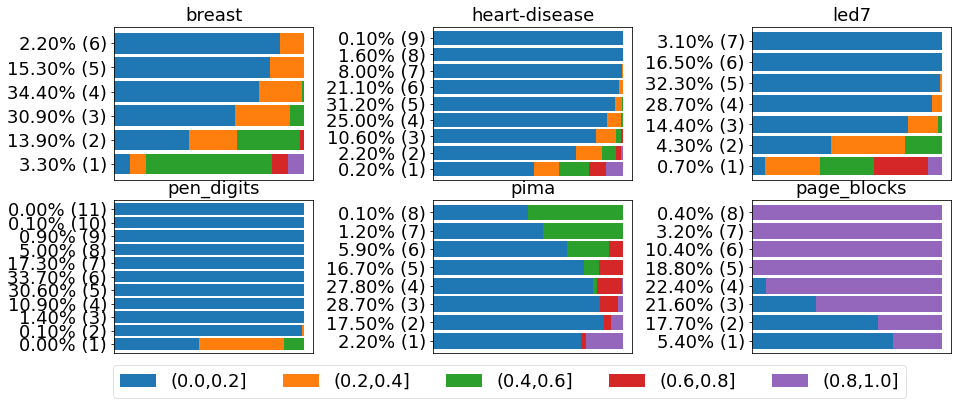

In [18]:
font_size = 18
horiz_offset= .9
n_bins = 5

lst = ['breast', 'heart-disease', 'led7', 'pen_digits', 'pima', 'page_blocks']

n_columns = int(len(lst)/2)
f, axes = plt.subplots(2, n_columns, figsize = (15, 6))

for i, data_name in enumerate(lst):
    
    df = pd.read_csv('./results/fr_discribution_by_levels_' + str(n_bins) + '/' + data_name + '.csv', index_col=0)
    df_new = df.drop(['total', 'k', 'labels'], axis = 1)

    ax = df_new.plot.barh(stacked=True, edgecolor='none', width=0.85, ax = axes[int(i/n_columns), i%n_columns], fontsize = font_size)
    ax.tick_params(axis='both', which='major', labelsize=font_size )
    ax.set_yticklabels(df.labels, fontsize = font_size)
    ax.set_title(data_name, fontsize = font_size)
    ax.get_legend().remove()

    ax.tick_params(
            axis='x',          
            which='both',    
            bottom=False,      
            top=False,        
            labelbottom=False)

plt.legend(prop = {'size' : font_size}, framealpha=0.6, ncol=5, bbox_to_anchor=(-3.25, -.35, 0., 1.102), loc='lower left',)
plt.subplots_adjust(wspace=.6, hspace = .13)
plt.savefig('./results/levels_distribution.png', dpi=300, transparent=True)

<ipython-input-21-852f7e626b1d>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axes[int(i/n_columns), i%n_columns].set_xticks([], [])
<ipython-input-21-852f7e626b1d>:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axes[int(i/n_columns), i%n_columns].set_yticks([], [])


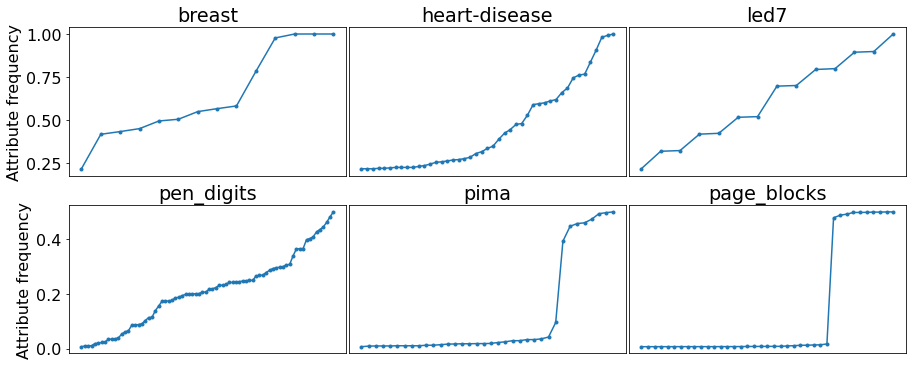

In [21]:
lst = ['breast', 'heart-disease', 'led7', 'pen_digits', 'pima', 'page_blocks']

n_columns = int(len(lst)/2)
f, axes = plt.subplots(2, n_columns, figsize = (15, 6))

for i, data_name in enumerate(lst):#
    data_file_name = data_dir_name + data_name + '/transformed/' + data_name + '_liv_without_labels.dat'
    X, indices, inverse_indices = dat_to_binary(data_file_name, return_index = True, return_inverse = True)
    if np.all(np.isnan(X[:, X.shape[1] - 1])):
        X = np.delete(X, X.shape[1] - 1, 1)
    X = X.astype(int)

    axes[int(i/n_columns), i%n_columns].plot(sorted(np.mean(X, axis = 0)), marker = '.')
    axes[int(i/n_columns), i%n_columns].set_xticks([], [])
    axes[int(i/n_columns), i%n_columns].set_title(data_name)
    if int(i%n_columns) > 0:
        axes[int(i/n_columns), i%n_columns].set_yticks([], [])

for i in range(2):
    axes[i,0].set_ylabel('Attribute frequency')
plt.subplots_adjust(wspace=.01, hspace = .2)
#plt.savefig('./results/attribute_frequency.png', dpi=300, transparent=True)

# F1 measure

In [22]:
df_total_count = pd.read_csv('./results/f1_by_levels_count.csv', index_col=0)
df_total_summary = pd.read_csv('./results/f1_by_levels_summary.csv', index_col=0)

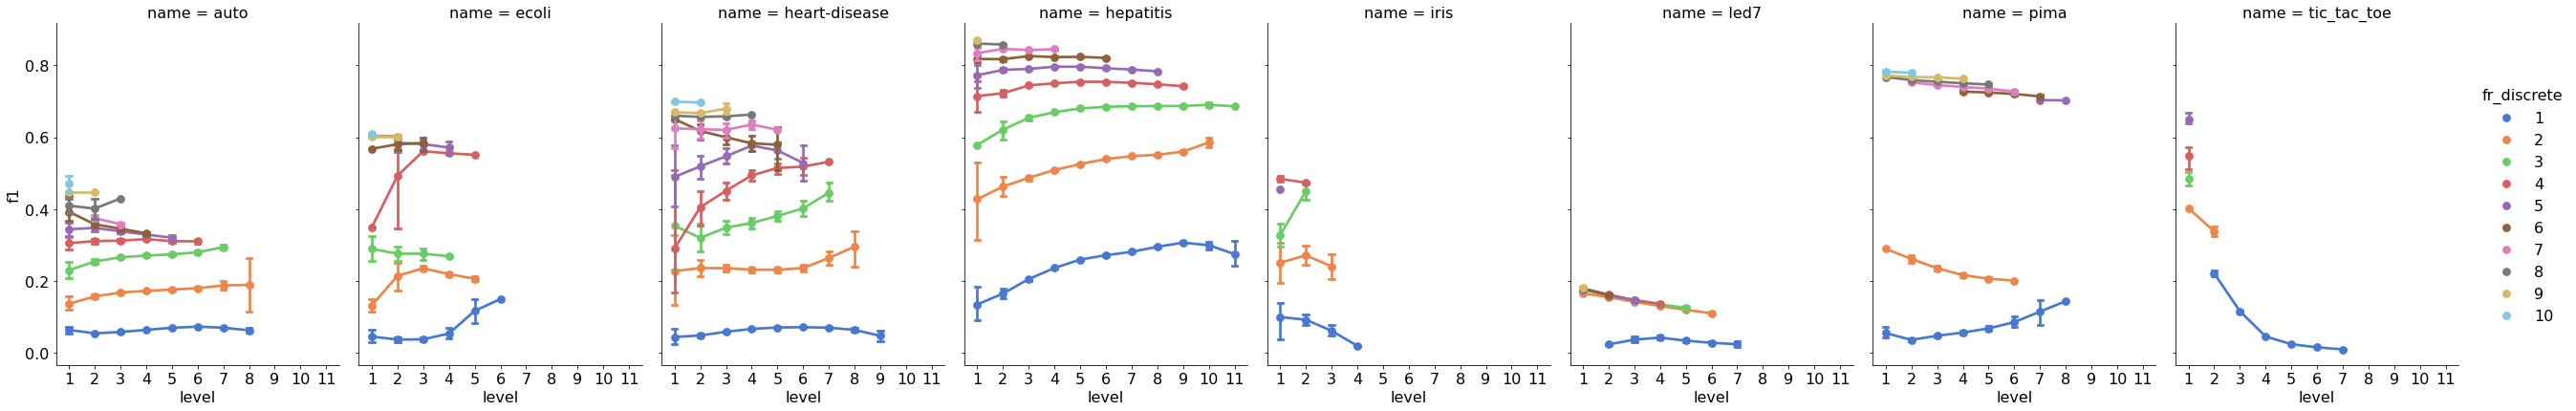

In [23]:
# F1 by levels
g = sns.catplot(x="level", y="f1", hue="fr_discrete", col = 'name',
                capsize=.2, palette="muted", height=6, aspect=.75,
                kind="point", data=df_total_summary)

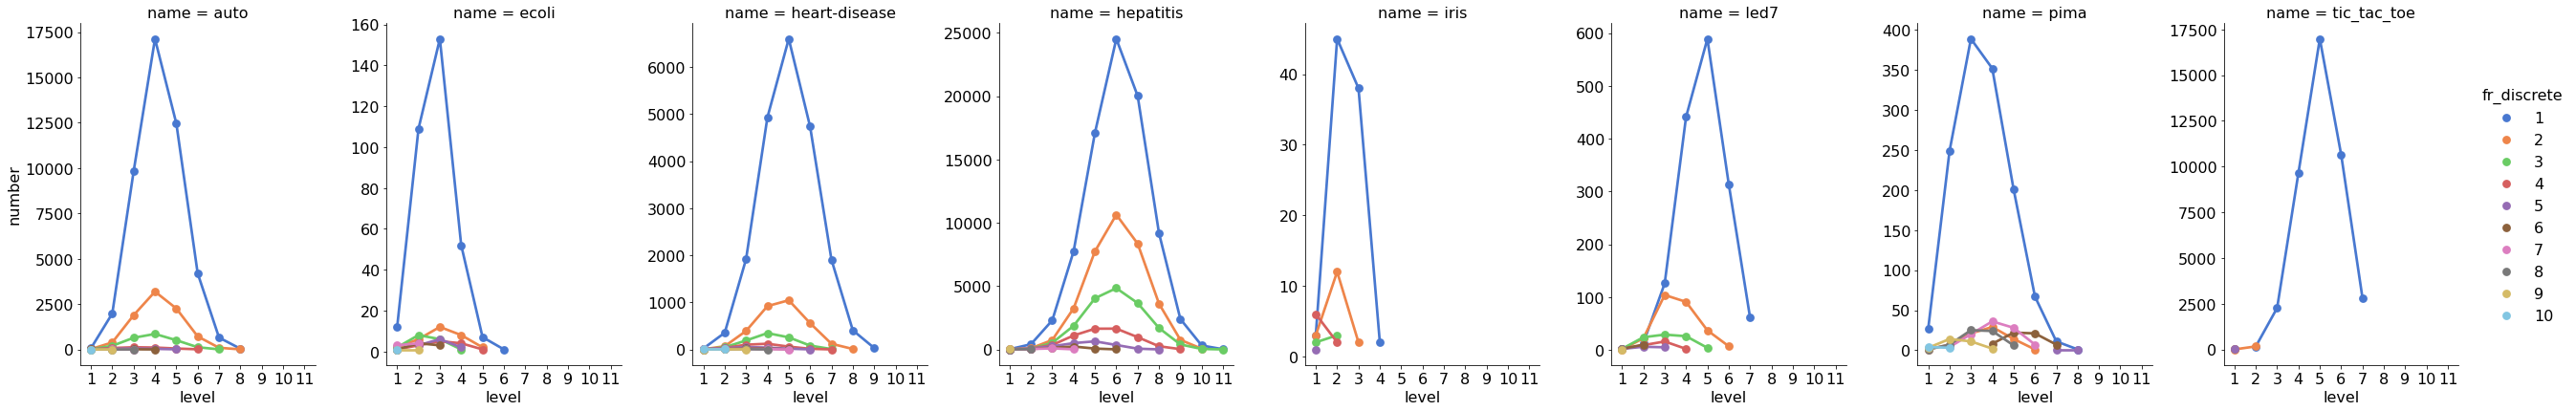

In [24]:
# Numbers by levels
g = sns.catplot(x="level", y="number", hue="fr_discrete", col = 'name',
                capsize=.2, palette="muted", height=6, aspect=.75,
                kind="point", data=df_total_count, sharey=False)